In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
data1 = pd.read_csv("Linear_X_Train.csv")

In [66]:
X_train=data1.values

In [67]:
X_train

array([[-0.28930742],
       [-0.58880963],
       [ 1.02750749],
       ...,
       [-0.30516366],
       [ 1.67583291],
       [-0.49175724]])

In [68]:
data2 = pd.read_csv("Linear_Y_Train.csv")

In [69]:
y_train =  data2.values

len(y_train)
y_train

array([[-9.11011171e-02],
       [-5.34677208e+01],
       [ 7.54570088e+01],
       ...,
       [-3.49832749e+01],
       [ 1.45206092e+02],
       [-1.71244939e+01]])

In [70]:
X_test = pd.read_csv("Linear_X_Test.csv").values


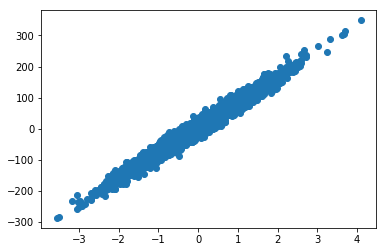

In [71]:
plt.scatter(X_train,y_train)

In [59]:
class LinearRegression:
    
    def __init__(self, lr=.01, iters=10):
        self.lr = lr
        self.iters = iters
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
        self.coef = 0.0
        self.bias = 0.0
        
        errors = []
        
        for i in range(self.iters):
            self.gradient_dec()
            errors.append(self.error())
            
        return errors
    
    def gradient_dec(self):
        d_coef, d_bias = self.gradient()
        
        self.coef -= d_coef * self.lr
        self.bias -= d_bias * self.lr
    
    def gradient(self):
        yh = LinearRegression.hypothesis(self.bias, self.coef, self.X)
        diff = yh - self.y.reshape(-1, 1)
        d_coef = np.sum(diff * self.X) / len(self.X)
        d_bias = np.sum(diff) / len(self.X)
        
        return d_coef, d_bias
        
    def error(self):
        yh = LinearRegression.hypothesis(self.bias, self.coef, self.X)
        diff = yh - self.y.reshape(-1, 1)
        return np.sum(diff ** 2)
        
    @classmethod
    def hypothesis(cls, bias, coef, X):
        return X * coef + bias
        
    def predict(self, X):
        return LinearRegression.hypothesis(self.bias, self.coef, X).flatten()

In [60]:
model = LinearRegression(lr=.1, iters=100)

In [75]:
errors = model.fit(X_train, y_train)

In [76]:
yh = model.predict(X_test)

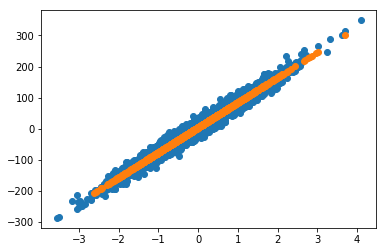

In [77]:
plt.scatter(X_train,y_train)
plt.scatter(X_test,yh)

In [81]:
hard_work2 = {
    "y" : list(yh)
}
# yh.dtype = "int"
yh

array([-147.52439132,  -66.26570453, -200.05620583, ...,   14.03673979,
        -18.66650943,  -51.07517461])

In [82]:
df2 = pd.DataFrame.from_dict(hard_work2)

In [83]:
df2

,y
0,-147.524391
1,-66.265705
2,-200.056206
3,226.036217
4,51.326541
5,-100.621906
6,-12.125819
7,27.251042
8,-62.452996
9,-117.210575


In [51]:
df2.to_csv("hard_work.csv")